# Denmark Covid Data Analysis

This notebook is a simple analysis of the Covid-19 data in Denmark.

In [157]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [158]:
# set the display options since we are working with a lot of data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [159]:
df = pd.read_csv('./data/denmark-covid-data.csv', index_col=None)

## View Raw Data

After we imported the data, it is smart to start by seeing what we are working with, so therefore we will start by looking at the raw data.

That means we can now see what we should work with, and what we should clean up.

In [160]:
df.shape

(763, 67)

In [161]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,DNK,Europe,Denmark,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,-273.0,-4.76,-7.23,-46.961262
1,DNK,Europe,Denmark,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
2,DNK,Europe,Denmark,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
3,DNK,Europe,Denmark,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
4,DNK,Europe,Denmark,2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
5,DNK,Europe,Denmark,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
6,DNK,Europe,Denmark,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
7,DNK,Europe,Denmark,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,Na

In [162]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
753,DNK,Europe,Denmark,2022-02-24,2691663.0,25209.0,29752.000,4461.0,39.0,36.286,463017.920,4336.434,5117.917,767.378,6.709,6.242,0.73,37.0,6.365,1746.0,300.346,NaN,NaN,2732.0,469.957,87011.0,62517623.0,10754.236,14.968,91149.0,15.679,0.3264,3.1,tests performed,13166440.0,4843956.0,4741159.0,3628375.0,2208.0,1896.0,226.49,83.33,81.56,62.42,326.0,93.0,0.002,16.67,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
754,DNK,Europe,Denmark,2022-02-25,2714447.0,22784.0,27912.857,4501.0,40.0,35.857,466937.207,3919.287,4801.549,774.259,6.881,6.168,0.72,45.0,7.741,1762.0,303.098,NaN,NaN,2696.0,463.764,67087.0,62584710.0,10765.776,11.540,86994.0,14.965,0.3209,3.1,tests performed,13168210.0,4844048.0,4741488.0,3629724.0,1770.0,1807.0,226.52,83.33,81.56,62.44,311.0,88.0,0.002,16.67,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
755,DNK,Europe,Denmark,2022-02-26,2731806.0,17359.0,25635.000,4538.0,37.0,37.143,469923.290,2986.083,4409.714,780.623,6.365,6.389,0.71,45.0,7.741,1572.0,270.414,NaN,NaN,2636.0,453.443,46326.0,62631036.0,10773.745,7.969,82817.0,14.246,0.3095,3.2,tests performed,13169348.0,4844120.0,4741771.0,3630507.0,1138.0,1798.0,226.54,83.33,81.57,62.45,309.0,88.0,0.002,16.67,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
756,DNK,Europe,Denmark,2022-02-27,2748260.0,16454.0,24315.571,4584.0,46.0,38.857,472753.695,2830.405,4182.747,788.536,7.913,6.684,0.71,48.0,8.257,1643.0,282.628,NaN,NaN,2543.0,437.445,55683.0,62686719.0,10783.324,9.579,78105.0,13.436,0.3113,3.2,tests performed,13170328.0,4844179.0,4741988.0,3631208.0,980.0,1791.0,226.56,83.33,81.57,62.46,308.0,89.0,0.002,16.67,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
757,DNK,Europe,Denmark,2022-02-28,2764838.0,16578.0,22557.714,4612.0,28.0,38.714,475605.430,2851.736,3880.362,793.353,4.817,6.660,0.70,42.0,7.225,1751.0,301.206,NaN,NaN,2459.0,422.995,80900.0,62767619.0,10797.240,13.916,73195.0,12.591,0.3082,3.2,tests performed,13172046.0,4844256.0,4742292.0,3632532.0,1718.0,1739.0,226.58,83.33,81.58,62.49,299.0,88.0,0.002,16.67,5813302.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
758,DNK,Europe,Denmark,2022-03-01,2783399.0,18561.0,20855.000,4649.0,37.0,39.143,478798.280,3192.850,3587.462,799.718,6.365,6.733,0.69,48.0,8.257,1734.0,298.281,NaN,NaN,2397.0,412.330,66704.0,62834323.0,10808.715,11.474,69714.0,11.992,0.2992

In [163]:
null_counts = pd.DataFrame(df.isnull().sum()).T
null_counts

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,0,0,0,25,26,38,41,43,61,25,26,38,41,43,61,41,22,22,61,61,763,763,42,42,18,18,18,18,9,9,41,41,2,323,323,336,423,326,316,323,323,336,423,316,316,316,5,0,0,0,0,0,0,0,0,0,0,0,763,0,0,0,655,655,655,655


## Data Cleaning

We will start by dropping the columns that we don't need

In [164]:
df = df.drop(['iso_code', 'continent', 'location'], axis=1)
# iso_code, continent, location are not needed since we only have Danish data
df = df.drop(['new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million'], axis=1)
df = df.drop(['reproduction_rate', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'], axis=1)
df = df.drop(['new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units'], axis=1)
df = df.drop(['total_boosters', 'total_boosters_per_hundred'], axis=1)
df = df.drop(['new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred'], axis=1)
df = df.drop(['stringency_index', 'population_density', 'median_age', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers'], axis=1)
df = df.drop(['handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index'], axis=1)
df = df.drop(['aged_65_older', 'aged_70_older'], axis=1)
df = df.drop(['excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million'], axis=1)

In [165]:
df.shape

(763, 27)

In [166]:
df.head(10)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
1,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
2,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
3,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
4,2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
5,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
6,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
7,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
8,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
9,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0


In [167]:
df.tail(10)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
753,2022-02-24,2691663.0,25209.0,4461.0,39.0,463017.920,4336.434,767.378,6.709,37.0,6.365,1746.0,300.346,87011.0,62517623.0,10754.236,14.968,0.3264,3.1,13166440.0,4843956.0,4741159.0,2208.0,226.49,83.33,81.56,5813302.0
754,2022-02-25,2714447.0,22784.0,4501.0,40.0,466937.207,3919.287,774.259,6.881,45.0,7.741,1762.0,303.098,67087.0,62584710.0,10765.776,11.540,0.3209,3.1,13168210.0,4844048.0,4741488.0,1770.0,226.52,83.33,81.56,5813302.0
755,2022-02-26,2731806.0,17359.0,4538.0,37.0,469923.290,2986.083,780.623,6.365,45.0,7.741,1572.0,270.414,46326.0,62631036.0,10773.745,7.969,0.3095,3.2,13169348.0,4844120.0,4741771.0,1138.0,226.54,83.33,81.57,5813302.0
756,2022-02-27,2748260.0,16454.0,4584.0,46.0,472753.695,2830.405,788.536,7.913,48.0,8.257,1643.0,282.628,55683.0,62686719.0,10783.324,9.579,0.3113,3.2,13170328.0,4844179.0,4741988.0,980.0,226.56,83.33,81.57,5813302.0
757,2022-02-28,2764838.0,16578.0,4612.0,28.0,475605.430,2851.736,793.353,4.817,42.0,7.225,1751.0,301.206,80900.0,62767619.0,10797.240,13.916,0.3082,3.2,13172046.0,4844256.0,4742292.0,1718.0,226.58,83.33,81.58,5813302.0
758,2022-03-01,2783399.0,18561.0,4649.0,37.0,478798.280,3192.850,799.718,6.365,48.0,8.257,1734.0,298.281,66704.0,62834323.0,10808.715,11.474,0.2992,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
759,2022-03-02,2803857.0,20458.0,4687.0,38.0,482317.451,3519.170,806.254,6.537,42.0,7.225,1666.0,286.584,64039.0,62898362.0,10819.731,11.016,0.2938,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
760,2022-03-03,2803857.0,0.0,4687.0,0.0,482317.451,0.000,806.254,0.000,42.0,7.225,1623.0,279.187,46068.0,62944430.0,10827.655,7.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
761,2022-03-04,2837501.0,33644.0,4772.0,85.0,488104.867,5787.417,820.876,14.622,34.0,5.849,1602.0,275.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0
762,2022-03-05,2853236.0,15735.0,4830.0,58.0,490811.590,2706.723,830.853,9.977,35.0,6.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5813302.0


Now we still have a lot of null values, so we will start by filling the null values with 0 since we can assume that if there is no data, then there are no cases.

In [168]:
df.isnull().sum()

date                                     0
total_cases                             25
new_cases                               26
total_deaths                            41
new_deaths                              43
total_cases_per_million                 25
new_cases_per_million                   26
total_deaths_per_million                41
new_deaths_per_million                  43
icu_patients                            22
icu_patients_per_million                22
hosp_patients                           61
hosp_patients_per_million               61
new_tests                               18
total_tests                             18
total_tests_per_thousand                18
new_tests_per_thousand                  18
positive_rate                           41
tests_per_case                          41
total_vaccinations                     323
people_vaccinated                      323
people_fully_vaccinated                336
new_vaccinations                       326
total_vacci

In [169]:
df.fillna(0, inplace=True)

In [170]:
df.head(10)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0
1,2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0
2,2020-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0
3,2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0
4,2020-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0
5,2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0
6,2020-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0
7,2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0
8,2020-02-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0
9,2020-02-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5813302.0


In [171]:
df.tail(10)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
753,2022-02-24,2691663.0,25209.0,4461.0,39.0,463017.920,4336.434,767.378,6.709,37.0,6.365,1746.0,300.346,87011.0,62517623.0,10754.236,14.968,0.3264,3.1,13166440.0,4843956.0,4741159.0,2208.0,226.49,83.33,81.56,5813302.0
754,2022-02-25,2714447.0,22784.0,4501.0,40.0,466937.207,3919.287,774.259,6.881,45.0,7.741,1762.0,303.098,67087.0,62584710.0,10765.776,11.540,0.3209,3.1,13168210.0,4844048.0,4741488.0,1770.0,226.52,83.33,81.56,5813302.0
755,2022-02-26,2731806.0,17359.0,4538.0,37.0,469923.290,2986.083,780.623,6.365,45.0,7.741,1572.0,270.414,46326.0,62631036.0,10773.745,7.969,0.3095,3.2,13169348.0,4844120.0,4741771.0,1138.0,226.54,83.33,81.57,5813302.0
756,2022-02-27,2748260.0,16454.0,4584.0,46.0,472753.695,2830.405,788.536,7.913,48.0,8.257,1643.0,282.628,55683.0,62686719.0,10783.324,9.579,0.3113,3.2,13170328.0,4844179.0,4741988.0,980.0,226.56,83.33,81.57,5813302.0
757,2022-02-28,2764838.0,16578.0,4612.0,28.0,475605.430,2851.736,793.353,4.817,42.0,7.225,1751.0,301.206,80900.0,62767619.0,10797.240,13.916,0.3082,3.2,13172046.0,4844256.0,4742292.0,1718.0,226.58,83.33,81.58,5813302.0
758,2022-03-01,2783399.0,18561.0,4649.0,37.0,478798.280,3192.850,799.718,6.365,48.0,8.257,1734.0,298.281,66704.0,62834323.0,10808.715,11.474,0.2992,3.3,0.0,0.0,0.0,0.0,0.00,0.00,0.00,5813302.0
759,2022-03-02,2803857.0,20458.0,4687.0,38.0,482317.451,3519.170,806.254,6.537,42.0,7.225,1666.0,286.584,64039.0,62898362.0,10819.731,11.016,0.2938,3.4,0.0,0.0,0.0,0.0,0.00,0.00,0.00,5813302.0
760,2022-03-03,2803857.0,0.0,4687.0,0.0,482317.451,0.000,806.254,0.000,42.0,7.225,1623.0,279.187,46068.0,62944430.0,10827.655,7.925,0.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,5813302.0
761,2022-03-04,2837501.0,33644.0,4772.0,85.0,488104.867,5787.417,820.876,14.622,34.0,5.849,1602.0,275.575,0.0,0.0,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,5813302.0
762,2022-03-05,2853236.0,15735.0,4830.0,58.0,490811.590,2706.723,830.853,9.977,35.0,6.021,0.0,0.000,0.0,0.0,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,5813302.0


## Data Visualization

Since every data is time based, we have made a function that can plot the data for us over time.

That will also make it easier for us to make numerous visualizations.

In [172]:
# Calculate the number of points to skip between each displayed date
skip = max(len(df) // 10, 1)  # Show one date every 10% of x-axis length
xticks = np.arange(0, len(df), skip)

def plot_over_date(df, column, column_title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df[column], marker='o', linestyle='-')
    plt.title(column_title + ' Over Time')
    plt.xlabel('Date')
    plt.ylabel(column_title)

    # Set ticks to show only one date every 10% of the x-coordinate
    plt.xticks(xticks, df['date'][xticks], rotation=45)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

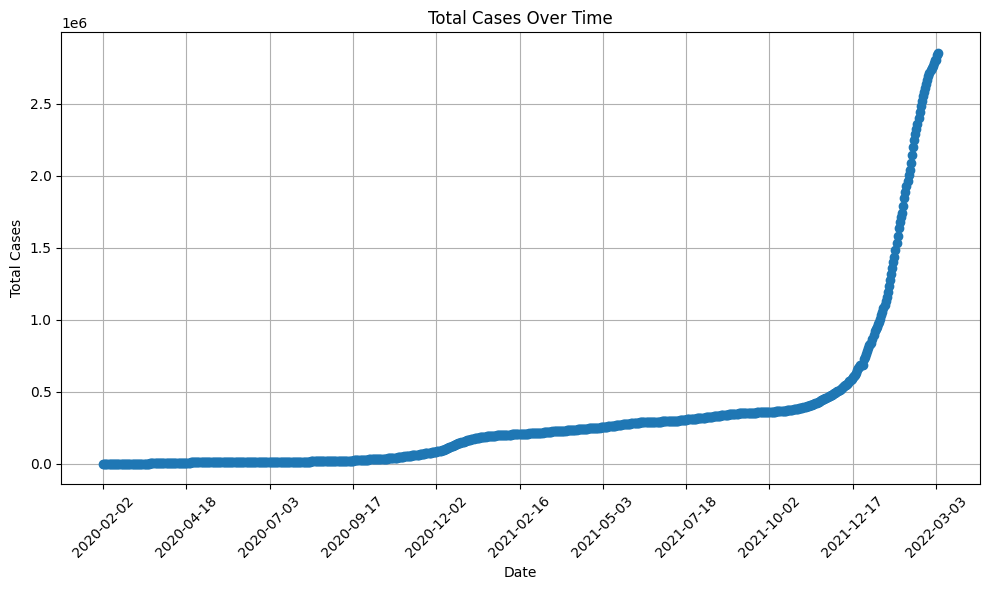

In [173]:
plot_over_date(df, 'total_cases', 'Total Cases')

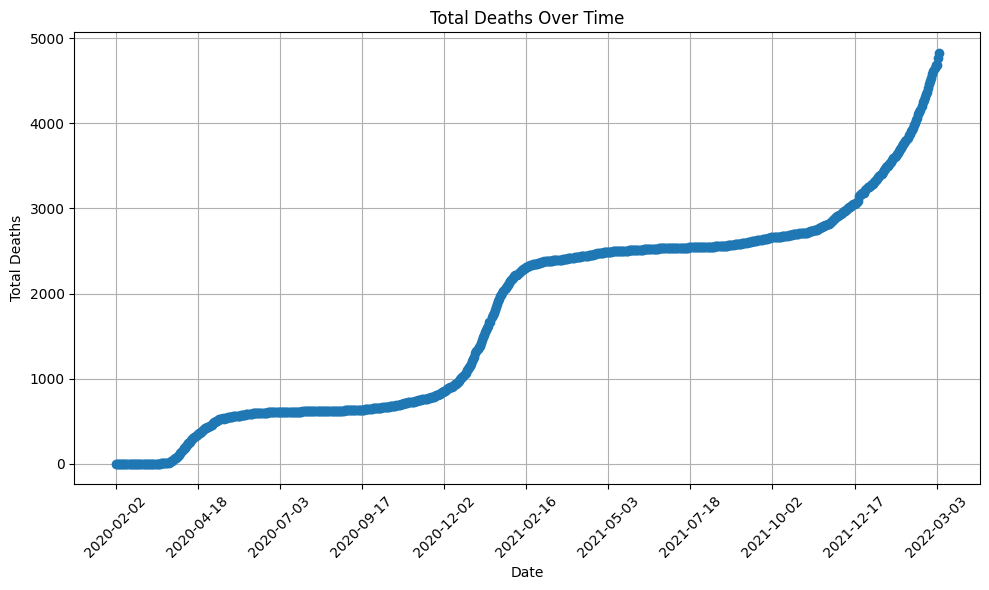

In [174]:
plot_over_date(df, 'total_deaths', 'Total Deaths')

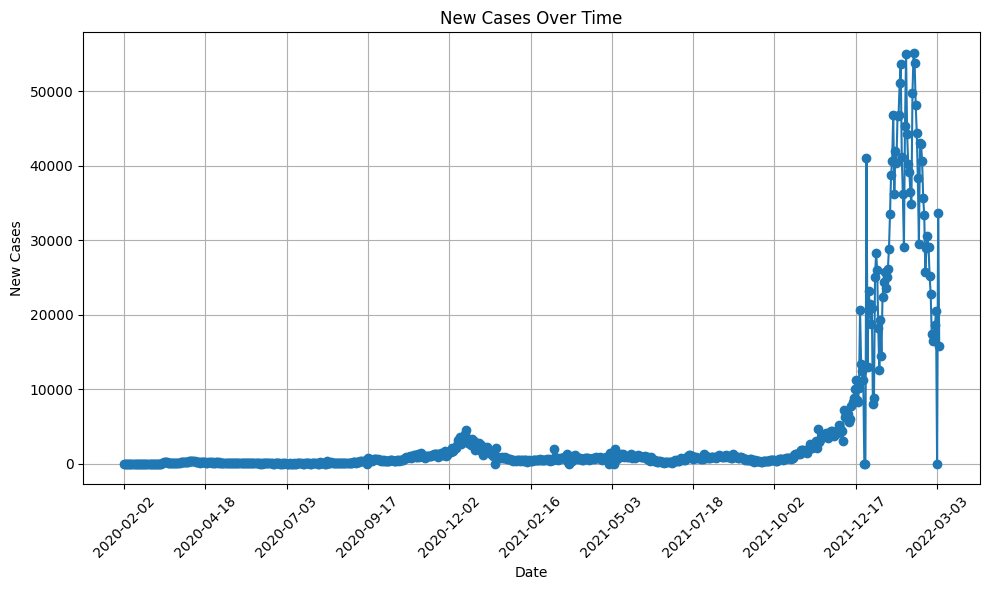

In [175]:
plot_over_date(df, 'new_cases', 'New Cases')